# Implementing a Fully Connected Network for Kaggle ASL Dataset

In this notebook, we will construct a fully connected neural network to develop a classifier for American Sign Language (ASL) hand-gesture letters. In other words, our goal is to create a model capable of interpreting a 28x28 image of a hand gesture and determining the corresponding letter. This exercise will primarily leverage numpy, avoiding the use of more powerful frameworks like TensorFlow. While this approach might have some disadvantages in terms of computing and accuracy performance, it is expected to be highly valuable for understanding the fundamentals of Deep Learning.

The dataset is composed of two dataframes with the following numerical structure:


| label | pixel1 | pixel2 | ... | pixel784 |
| --- | --- | --- | --- | --- |
| 3 | 107 | 184 | ... | 128 |



Each label corresponds to a numeric position in the alphabet, and each pixel represents the intensity in a 28x28 grid (28x28=784). During the exercise, we will implement a strategy for splitting the validation dataset into two to ultimately demonstrate the predictive capability of the model we build on unknown images through training, validation, and testing.

**Let's code!**


We will start by calling some Python libraries for our task

## Calling dataset

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are invoking libraries to address the task of American Sign Language (ASL) Classification.
<br><br>
    <b>Why:</b><br>
    These libraries are essential for manipulating data and implementing the functionalities needed for our task. We will use:
    <ul>
        <li><b>numpy:</b> It provides functions like the dot product and facilitates working with vectors, matrices, and tensors.</li>
        <li><b>string:</b> ASL letters are represented as numeric values, and this library helps us map between them.</li>
        <li><b>pandas:</b> We will use it to manage our dataset.</li>
        <li><b>matplotlib:</b> It is used for creating plots or visual representations of data.</li>
        <li><b>cv2:</b> This library aids in working with grayscale images, converting numeric values to images, and vice versa.</li>
        <li><b>os:</b> It allows us to read the dataset stored on the local computer.</li>
    </ul><br>
    <b>How:</b><br>
    We will import these libraries, which should have been previously installed using a package manager like pip or conda.
<br>
</div>


In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


Now let's call the datasets

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are crafting a function, `get_data`, to fetch the American Sign Language (ASL) dataset images. In this dataset, images are represented numerically in a tabular format. Each row corresponds to an individual image, and each column represents pixel intensity levels in grayscale, along with the associated label or letter that the image signifies.
<br><br>
    <b>Why:</b><br>
    This function is pivotal for obtaining the data required to train our neural network to recognize ASL hand gestures. By securing a well-organized dataset, we facilitate effective learning for the model in a supervised learning setting, and illustrate the conversion of raw pixel values into comprehensible and significant information, establishing the foundation for knowledge discovery and model assessment.
<br><br>
    <b>How:</b><br>
    The `get_data` function primarily seeks the dataset from a local directory (`./asl_data/`). If the local search fails, the function then fetches the data from a designated GitHub repository URL. The acquired data is structured into pandas DataFrames for organized storage of images and their corresponding labels. The function yields two DataFrames: `train_df`, which houses the training dataset, and `valid_df`, which contains the validation dataset, facilitating subsequent application in model training and assessment activities.
<br>
</div>

In [2]:
def get_data(gh_url=''):
    """
    Retrieves MNIST datasets either from local storage or from an optional
    GitHub URL.

    Args:
        gh_url (str): Optional parameter containing a GitHub URL where the
        datasets are located.

    Returns:
        pd.DataFrame, pd.DataFrame: A DataFrame with the training data and
        another with the validation data.
    """

    # Defining local paths
    train_local_path = './asl_data/sign_mnist_train.csv'
    valid_local_path = './asl_data/sign_mnist_valid.csv'

    # Defining GitHub paths
    train_gh_url = f'{gh_url}sign_mnist_train.csv'
    valid_gh_url = f'{gh_url}sign_mnist_valid.csv'

    # Checking if files are available locally
    train_exists = os.path.exists(train_local_path)
    valid_exists = os.path.exists(valid_local_path)
    local_files_available = train_exists and valid_exists

    # If local files are available, load them; otherwise, load from GitHub
    if local_files_available:
        train_df = pd.read_csv(train_local_path)
        valid_df = pd.read_csv(valid_local_path)
    else:
        train_df = pd.read_csv(train_gh_url)
        valid_df = pd.read_csv(valid_gh_url)

    # Returning training and validation DataFrames
    return train_df, valid_df


In [3]:
# Load datasets
train_df, valid_df = get_data('/')

# Visualize shapes and head of trainning
print('------')
print(f'Train dataset shape {train_df.shape}')
print(f'Validation dataset shape {valid_df.shape}')
print('------')
train_df.head()


------
Train dataset shape (27455, 785)
Validation dataset shape (7172, 785)
------


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Results above display the expected data structure of images by rows, with labels and pixels representing the values of their grey intensity. Since we will be manipulating the datasets beyond this point, we will store some original copies in case the unaffected datasets are needed.


In [4]:
# Store copies of original DataFrames
train_df_original = train_df.copy()
valid_df_original = valid_df.copy()


Next, we will define a function to split the validation dataset into two; this will result in six datasets: training, validation, and testing, where each will have an x version (features) and a y version (labels).


### Import images function

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We're segregating our data into features (x) and labels (y) to facilitate model training. We create a training set to instruct the model, a validation set to verify its learning accuracy, and a test set to assess its predictive capability on unseen data.
    <ul>
        <li><b>x_train and y_train:</b> They contain the training features and labels.</li>
        <li><b>x_val and y_val:</b> They hold the features and labels used for validating our training.</li>
        <li><b>x_test and y_test:</b> They encompass the features and labels of unseen data to test our model.</li>
    </ul>
<br>
    <b>Why:</b><br>
    While our data is initially divided into training and validation sets, having an additional test set enables us to ensure that our model generalizes well to new, unseen data. Employing a function for this task aids in maintaining objectivity and ensuring our model is equitable and proficient in managing uncertainty.
<br><br>
    <b>How:</b><br>
    We extract labels from the 'label' column, with the remaining columns serving as our features. We introduce a function, <b>split_val_test</b>, allowing us to customize the size and optionally shuffle the data, enabling the bifurcation of our validation set into two: one for validation and one for testing. This function maintains the integrity and order of the data, yielding precise subsets for validation and testing.
<br>
</div>

In [5]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded
    validation set into validation and test.

    Args:
      x (np.array): Input array for predictors; it must be a 2D array.
      y (np.array): This should be a 1D numpy array with the same length
                    as x.shape[0].
      pct (float): Should be between 0.0 and 1.0 and represent the proportion
                   of the dataset to include in the test split (x_test).
      shuffle (bool): Decides whether to shuffle the rows of x and y arrays.

    Returns:
      x_val (np.array): Output array containing the predictors with
                        x.shape[0]*(1-pct) records for the validation set.
      y_val (np.array): Output array containing the labels with
                        x.shape[0]*(1-pct) records for the validation set.
      x_test (np.array): Output array containing the predictors with
                         x.shape[0]*pct records for the testing set.
      y_test (np.array): Output array containing the labels with
                         x.shape[0]*pct records for the testing set.
    '''
    # Arguments validation
    ## Check correct pct value
    if pct < 0 or pct > 1:
        raise ValueError("Invalid input: 'pct' should be between 0.0 and 1.0")
    ## Check y dimensionality
    if y.ndim != 1:
        raise ValueError("y should be 1D numpy array")
    ## Check x and y has the same number of rows
    if x.shape[0] != y.shape[0]:
        raise ValueError("Invalid input: x and y arrays should have the same "
                         "amount of rows")

    # Get the number of rows equivalent to pct selected
    test_nrows = int(x.shape[0] * pct)

    # Shuffle the values (if option selected)
    if shuffle:
        ## Generate random indices for shuffling
        random_indices = np.random.permutation(x.shape[0])
        x = x[random_indices, :]
        y = y[random_indices]

    # Select the first N - test_nrows rows (N = total number of records)
    # for the validation set
    x_val = x[-test_nrows:, :]
    y_val = y[-test_nrows:]

    # Select the last test_nrows of the arrays for the testing set
    x_test = x[:-test_nrows, :]
    y_test = y[:-test_nrows]

    return x_val, y_val, x_test, y_test


Although we could call the function right now, we choose not to do so just yet. This is because there are still some data transformations required, including normalization and the removal of the letters <b>J</b> and <b>Z</b>, as these gestures involve movement, which we cannot capture with a static-image dataset.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We will omit <b>J</b> and <b>Z</b> from our dataset.
<br><br>
    <b>Why:</b><br>
    Signs <b>J</b> and <b>Z</b> inherently involve movement, and since our dataset consists of static images, these movements aren't captured, making them incompatible with our model’s scope. Our neural network is conceived to interpret ASL from static images representing hand gestures, and signs like <b>J</b> and <b>Z</b> which involve motion, don’t conform to this criterion [1].
 <br><br>
    <b>How:</b><br>
    We will isolate and remove the rows corresponding to these letters in our datasets. Given that each label is numerically encoded based on the ascii_lowercase list, we will find the numeric representations of these letters, locate the corresponding rows in the labels dataset, identify and remove them. This will maintain the alignment between the features and labels in our datasets, omitting the rows related to <b>J</b> and <b>Z</b>.
<br>
</div>

![test_image](https://www.lingvano.com/asl/wp-content/uploads/sites/3/2022/11/Sign_alphabet_chart_abc.jpg)





In [6]:
def filter_datasets(train_df_original, valid_df_original):
    """
    Excludes rows with labels corresponding to 'j' and 'z' from the training
    and validation datasets.

    Args:
        train_df_original (pd.DataFrame): The original training dataset.
        valid_df_original (pd.DataFrame): The original validation dataset.

    Returns:
        pd.DataFrame, pd.DataFrame: The filtered training and validation
                                    datasets.
    """
    # Finding the keys corresponding to 'j' and 'z' in the alphabet dictionary
    
    reverse_alphabet_dict = {letter: i for i, letter in enumerate(string.ascii_lowercase)} 
    j_key = reverse_alphabet_dict.get('j')
    z_key = reverse_alphabet_dict.get('z')

    # Filtering out rows with labels 'j' and 'z' from the original training
    # and validation datasets
    condition_train = (
        (train_df_original['label'] != j_key) &
        (train_df_original['label'] != z_key)
    )
    filtered_train_df = train_df_original[condition_train]

    condition_valid = (
        (valid_df_original['label'] != j_key) &
        (valid_df_original['label'] != z_key)
    )
    filtered_valid_df = valid_df_original[condition_valid]

    return filtered_train_df, filtered_valid_df


The function above will assist us with the task at hand, allowing us to remove the specified letters from both datasets to prevent data leakage (having some images in the validation and test datasets that were not observed in the training one).

Next, we will proceed to create a normalization function that will help ensure the variables are on similar scales, mitigating issues such as varying light exposure that might result in different shades of grey in some images. This normalization will be based on z-scale, and we aim to transform the data to have a mean of 0 and a standard deviation of 1.


### Normalization

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We will to normalize the features.
<br><br>
    <b>Why:</b><br>
    Normalizing the features allows the model to interpret them based on their variation, not their raw values, avoiding any undue influence from features with larger numeric values. This process ensures a fair contribution from each feature to the model's performance by transforming them to have a mean of 0 and a standard deviation of 1 through Z-Scale normalization.
<br><br>
    <b>How:</b><br>
    We will use Z-Scale transformation for normalization. To avoid data leakage, the mean and standard deviation of the training dataset will be used to normalize the other datasets. Specifically, we will subtract the mean from every numeric value and then divide by the standard deviation, ensuring consistent and unbiased scaling across all datasets.
<br>
</div>


In [7]:
# Defining the Z-score normalization function
def normalize(x_mean, x_std, x_data):
    """
    Applies a Z-Scale transformation to a numpy array using provided x_mean and x_std.

    Args:
    x_mean (float): The mean value to be used for normalization.
    x_std (float): The standard deviation to be used for normalization.
    x_data (np.array): The array to which the normalization will be applied.

    Returns:
    np.array: The normalized array.
    """
    return (x_data - x_mean) / x_std


### Visualize samples

To better understand the problem, we will visualize some images. This will give us a clearer idea of the kind of data we are working with and what our Neural Network aims to solve. This step is primarily intended to develop an intuition about the problem.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We will visualize some examples in the training dataset.
<br><br>
    <b>Why:</b><br>
    Visualizing examples enhances our understanding of the classification task of letters in ASL from images of hand postures. By seeing the representation of different letters through various hand postures, we can intuitively comprehend how the numeric values in the dataframe correspond to different images. This insight is crucial, as it validates the potential of using these numeric values in a Neural Network to generate meaningful results.
<br><br>
    <b>How:</b><br>
    We will define a function to visualize a row from the dataframe, representing a letter in the ASL alphabet. This function will reshape the linear pixel values to a square image and use matplotlib to display it in grayscale, allowing us to interpret the numeric data as images.
<br>
</div>


The image shown corresponds to the following value: c


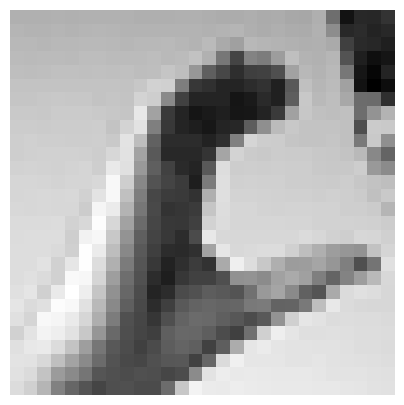

In [8]:
def plot_letter(image, letter):
    """
    Plots the given image in grayscale and displays the corresponding letter.

    Args:
    image (np.array): 1D array representing the image to be plotted.
    letter (str): The letter corresponding to the image.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))  # Assuming the image is 28x28 pixels
    plt.axis('off')
    plt.show()

# Reconstructing the alphabet dictionary
alphabet_dict = {idx: letter for idx, letter in enumerate(string.ascii_lowercase)}

# Extracting y and x from the train_df for a sample visualization
y_train_sample = train_df['label']
x_train_sample = train_df.drop(columns=['label'])

# Applying the plotting function to a random sample from the training dataset.
rand_idx = np.random.randint(len(y_train_sample))
selected_letter = alphabet_dict[y_train_sample.iloc[rand_idx]]
print('The image shown corresponds to the following value:', selected_letter)
plot_letter(x_train_sample.iloc[rand_idx].values, selected_letter)

## Create a Fully Connected Neural Network

As mentioned, we will create a fully connected neural network using almost exclusively numpy. Our aim is to construct a method to have a vertical line of neurons that can forward their values and perform backpropagation. We will measure their errors and loss function by comparing the outcomes to the true label information and will use ReLU to introduce non-linearity to our linear calculations, enabling us to better solve the classification problem.


### Our model equations



$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$ ... $$



$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Adittional Functions

#### Mini batches

We will begin by writing code to divide the information into batches. This will allow us to process the large dataset in smaller chunks and will also implement a shuffle functionality to ensure fairness in the distribution of the chunks.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are constructing an iterable object comprising subsets of images and labels.
<br><br>
    <b>Why:</b><br>
    Processing the entire dataset at once during training is often not feasible due to memory constraints. By utilizing subsets or mini-batches, we can efficiently train the model. This object will contain random samples from the dataset to avoid biases associated with the order of the labels, ensuring that each batch is representative and doesn't over-specialize in a specific subset of the data.
<br><br>
    <b>How:</b><br>
    We will implement a function that takes features and labels, shuffles them optionally, and then divides them into ‘k’ subsets. This function yields smaller batches of x and y, aiding in training our neural network incrementally. Employing mini-batches allows the cost function to average the error over the samples within each batch, fostering stable and generalized learning.
<br>
</div>

In [9]:
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    Function that converts the dataset into an iterator (generator) allowing to
    work with the dataset in chunks.

    Args:
      mb_size (int): Number of rows to split the dataset, the batch size.
      x (np.array): Predictors matrix; must have 784 fields.
      y (np.array): Labels vector; must be a 1D array.

    Returns:
      generator: An iterator that generates minibatches of data.
    '''
    
    # Verify that predictor and label sets have the same amount of records
    assert x.shape[0] == y.shape[0], 'Row count mismatch'

    # Get total number of records in the set
    total_data = x.shape[0]

    # Evaluate if shuffle option is active
    if shuffle:
        # Create an array of sequential numbers to simulate indexes
        idxs = np.arange(total_data)
        
        # Shuffle the values that represent the indexes
        np.random.shuffle(idxs)
        
        # Change the order of the rows in x and y the same way
        x = x[idxs]
        y = y[idxs]

    # Return a generator (an object type iterator), that iterates reading the
    # entire set in sets with length == to the mb_size
    return ((x[i:i + mb_size], y[i:i + mb_size]) for i in range(0, total_data, mb_size))


## Definee Tensor, Linear, ReLU and Sequential Classes

Moving forward, we will refer to most of our objects as tensors. We will create a class to facilitate this transformation.


###  Tensor Class

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are creating a class named `np_tensor`.
<br><br>
    <b>Why:</b><br>
    This class will be used in subsequent classes to ensure that the values are NumPy ndarrays, capable of performing the required mathematical operations.
<br><br>
    <b>How:</b><br>
    Since `np.ndarray` already possesses all the properties we require, our class will simply inherit from it without adding any additional functionality.
</div>


In [10]:
# Creating a new class derived from numpy ndarray to allow the assignment of attributes
class np_tensor(np.ndarray):
    pass


###   Linear Class

Here, we will define our linear layer along with the neurons; these neurons will require an input size and an output size. This layer will feature forward and backpropagation methods and essentially represents:


$$z^1 = W^1 X + b^1$$


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are constructing a class, `Linear`, representing a linear layer for the neural network, corresponding to \(Z = WX + b\). It visually represents a vertical layer in the network and is formulated to perform a linear transformation on the input data.
<br><br>
    <b>Why:</b><br>
    The linear layer is a foundational component in constructing neural networks and serves as a basic unit that modifies the input data. It plays a crucial role in learning representations within the network, serving as a precursor to activation functions and facilitating both forward and backward propagation within the network.
<br><br>
    <b>How:</b><br>
    Our class will encompass the following components:
    <ul>
        <li><b>__init__(self, input_size, output_size):</b> Initializes the weights 'W' and bias 'b' utilizing Kaiming He initialization [2], considering the provided input and output sizes.</li>
        <li><b>__call__(self, X):</b> Executes the forward pass, computing \( Z = WX + b \).</li>
        <li><b>backward(self, X, Z):</b> Calculates the gradients concerning the input, weights, and bias during the network's backward pass.</li>
    </ul>
</div>


In [11]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Initialize parameters using Kaiming He initialization.

        Args:
          input_size (int): Number of nodes in the previous layer or the
                            number of pixels in the input.
          output_size (int): Number of nodes in the current layer.
        '''
        
        # Get the initial values for weights matrix in the layer.
        # The weights matrix is of dimensions: nodes in the current layer X
        # nodes in the previous layer, as this value will be multiplied by
        # the input matrix (X) from the right.
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)


        # Get the initial value for bias vector with zeros.
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        '''
        Apply the linear function using the weights and biases to perform
        feedforward computation.

        Args:
          X (np.array or np_tensor): Input data.

        Returns:
          np.array or np_tensor: Result of the linear transformation.
        '''
        # Feedforward: Applying linear function using the weights and biases.
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        '''
        Calculate the backward propagation of the error (gradient).

        Args:
          X (np.array or np_tensor): Input data.
          Z (np.array or np_tensor): Intermediate computed value during
                                     feedforward.

        Returns:
          None: The function updates the gradients in-place.
        '''
        # Calculate the gradient
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)


### ReLU Class

To remove linearity and address the vanishing gradient problem, we will implement a ReLU layer. This layer will take the input from a linear layer and transform their values to the maximum between 0 and their value (effectively dropping negative values). This layer will also have forward and backpropagation methods.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are developing a class, `ReLU`, representing the Rectified Linear Unit (ReLU) activation function.
<br><br>
    <b>Why:</b><br>
    The ReLU activation function is integral in neural networks due to its efficacy in addressing the vanishing gradient problem, enabling the learning process in deeper networks. By introducing non-linearity, it allows the network to adapt and learn complex patterns, making adjustments based on the learned error [3].
<br><br>
    <b>How:</b><br>
    The `ReLU` class will have methods to perform the ReLU operation, replacing negative input values with zero while maintaining positive values. It will also contain a method to compute the gradient of the ReLU function during backpropagation, which is crucial for efficient weight updates in the neural network.
<br>
</div>


In [12]:
class ReLU():
    def __call__(self, Z):
        '''
        Apply the ReLU function, copying the same input value if positive or
        setting to 0 if negative.

        Args:
          Z (np.array or np_tensor): Input data.

        Returns:
          np.array or np_tensor: Result of applying the ReLU function.
        '''
        # Apply ReLU function, copying the same input value if positive or
        # setting to 0 if negative.
        return np.maximum(0, Z)

    def backward(self, Z, A):
        '''
        Compute the gradient for the ReLU function during backpropagation.

        Args:
          Z (np.array or np_tensor): Intermediate computed value during
                                     feedforward.
          A (np.array or np_tensor): Output of the activation function.

        Returns:
          None: The function updates the gradients in-place.
        '''
        # The slope of the activation function is 1, set its output gradient
        # the same as the function output node (now used as input in backward
        # propagation).
        Z.grad = A.grad.copy()

        # If the grad of the reversed input is lower than 0, set activation
        # function slope as 0.
        Z.grad[Z <= 0] = 0


### Sequential Class

Now that we have a method to generate the layers, we will create a coordinator for the full neural network, which we will call the 'Sequential' class. This will facilitate communication between the layers. The Sequential class will not only conclude with a predictor but will also manage the forward and backpropagation methods; it is here that we will define the learning rate, which will influence how much the gradients adjust the weights and biases values during backpropagation.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are developing a class, `Sequential_layers`, designed to manage and organize a sequence of layer objects, such as Linear and ReLU, in a structured manner to facilitate the streamlined execution of the neural network.
<br><br>
    <b>Why:</b><br>
    The structured organization of layers is paramount for ensuring seamless data flow through the network, allowing for efficient building, training, and execution of neural network models. This class plays a crucial role in managing forward and backward propagation through the network layers, serving as a conduit for data between them.
<br><br>
    <b>How:</b><br>
    The `Sequential_layers` class will implement the following methods:
    <br>
<ul>
<il><b>__init__(self, layers):</b> Initializes the class with structures to hold inputs and outputs at each layer, accepting a list of layer objects.</il>

<il><b>__call__(self, X):</b> Manages a forward pass through the sequence of layers, storing the intermediate outputs at each step.</il>

<il><b>backward(self):</b> Coordinates the backward pass through the sequence of layers in reverse order, calculating the gradients at each step.</il>

<il><b>update(self, learning_rate):</b> Updates the weights and biases of each layer in the sequence based on the computed gradients and a specified learning rate.</il>

<il><b>predict(self, X):</b> Executes a forward pass through the network and returns the model’s prediction as the index of the maximum value in the output.</il>
</ul>
</div>


In [13]:
class Sequential_layers():
    def __init__(self, layers):
        """
        Initializes the class with structures to hold inputs and outputs
        at each layer, accepting a list of layer objects.

        Args:
            layers (list): List containing objects of type Linear, ReLU.
        """
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        """
        Manages a forward pass through the sequence of layers, storing the
        intermediate outputs at each step.

        Args:
            X (np.array or np_tensor): Input data.

        Returns:
            np.array or np_tensor: The result after passing through all the layers.
        """
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l' + str(i)] = self.x
        return self.x

    def backward(self):
        """
        Coordinates the backward pass through the sequence of layers in reverse
        order, calculating the gradients at each step.
        """
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l' + str(i)], self.outputs['l' + str(i + 1)])

    def update(self, learning_rate=1e-3):
        """
        Updates the weights and biases of each layer in the sequence based on
        the computed gradients and a specified learning rate.

        Args:
            learning_rate (float): The learning rate used to update the parameters.
        """
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        """
        Executes a forward pass through the network and returns the model’s
        prediction as the index of the maximum value in the output.

        Args:
            X (np.array or np_tensor): Input data.

        Returns:
            int: Index of the maximum value in the output.
        """
        return np.argmax(self.__call__(X))


### Cost Function

To assess the performance of our network, we will create a cost function using a softmax of the output and comparing that output to the real known values; we will use this as a loss function. Additionally, we are implementing an accuracy function to determine how many values were predicted accurately.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are implementing the cross-entropy cost function, which utilizes softmax to quantify the dissimilarity between the model’s predictions and the actual labels.
<br><br>
    <b>Why:</b><br>
    The cross-entropy cost function is crucial for evaluating the model's performance during training, highlighting how well the model’s predictions match the true labels. Minimizing this function is essential for enhancing the model's predictive accuracy.
<br><br>
    <b>How:</b><br>
    We transition from an ideal state, where the probability of the true class is 1, and for other classes, it is 0, to applying the softmax operation to convert raw model outputs into probabilities. The computed cross-entropy loss represents the dissimilarity between the ideal and predicted probability distributions. The process involves:
    <ul>
        <li>Calculating the exponential of each score and normalizing them to obtain probabilities.</li>
        <li>Evaluating the cost by assessing the negative log probabilities attributed to the true classes and averaging over the batch size.</li>
        <li>Deriving the gradient of the loss concerning the raw scores (pre-softmax) for backpropagation.</li>
    </ul>
<br>
</div>


In [14]:
def softmaxXEntropy(x, y):
    """
    Calculates the gradients of the predicted values from the network and
    returns the predictions and the computed cost.

    Args:
      x (np.array): The network's raw output (logits).
      y (np.array): True class labels.

    Returns:
      np.array: The predicted probabilities after applying softmax.
      float: The computed cross-entropy cost.
    """
    
    # Get the number of columns (classes) of the input
    batch_size = x.shape[1]
    
    # Apply the function e^x to each element (class) of the input classes
    # predicted by the model
    exp_scores = np.exp(x)
    
    # Convert the class inputs into probabilities based on all the classes
    # (softmax function)
    probs = exp_scores / exp_scores.sum(axis=0)
    preds = probs.copy()
    
    # Cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    
    # Calculate the gradients generated from the cost
    cost = np.sum(-np.log(y_hat)) / batch_size
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # dl/dx
    x.grad = probs.copy()

    return preds, cost


def accuracy(mb_size, x, y):
    """
    Calculates the general accuracy of a model.

    Args:
      mb_size (int): Number of rows to split the dataset; the batch size.
      x (np.array): Validation or testing input fields for making predictions.
      y (np.array): Corresponding labels for the validation or testing fields.

    Returns:
      float: The calculated accuracy of the model.
    """
    correct = 0
    total = 0
    # We use a for loop as we utilize the minibatches function which obligates
    # to split the dataset
    
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # We run the model (feedforward) to get predictions
        pred = model(x.T.view(np_tensor))
    
        # If the index of the predicted class with the index of the real value
        # class, sum in the correct sum
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        
        # Continue adding in order to get the total number of records
        # (this value would be equivalent to x.shape[0])
        total += pred.shape[1]

    return correct / total


### Trainning Loop

Our model requires training to begin generating results. Each result will produce a loss, enabling us to use the backpropagation method to refine our values. After all, we do start with an initial set of values in our neurons, but those values can be updated over time. This illustrates the need to establish the training loop, where we will specify the number of epochs, the batch size, and the learning rate of our Neural Network.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We are defining a function, 'train', to facilitate the training of our model, returning both loss and accuracy for each epoch.
<br><br>
    <b>Why:</b><br>
    Training the model is a pivotal step in building neural networks, and having a dedicated function streamlines this process, allowing for efficient iterations and evaluations. This function leverages the constructed sequential model and the defined cross-entropy loss to optimize the model's parameters. Additionally, incorporating an accuracy measure alongside the loss provides a more intuitive and comprehensive view of the model's performance, facilitating evaluations and adjustments during the development phase.
<br><br>
    <b>How:</b><br>
    - The 'train' function iterates over a specified number of epochs, and within each epoch, it further iterates over minibatches of the training data.
    - For each minibatch, the function performs a forward pass through the model to obtain the scores, calculates the cross-entropy loss and performs backward propagation to update the model parameters using the specified learning rate.
    - After processing each minibatch, the function calculates and prints the cost and accuracy for that epoch, providing real-time feedback on the model’s performance during training.
    - The embedded 'accuracy' function calculates the model's accuracy by comparing the model’s predictions against the true labels over the validation data, providing an additional performance metric.
<br>
</div>


In [15]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    """
    Trains the model using the provided training data, for a specified number
    of epochs, minibatch size, and learning rate.

    Args:
      model (Sequential_layers): The neural network model to be trained.
      epochs (int): The number of times the model should be trained over the
                    entire dataset.
      mb_size (int): The size of the minibatches used during training.
                     Default is 128.
      learning_rate (float): The learning rate used during training.
                             Default is 1e-3.

    Returns:
      None: The function prints the cost and accuracy at the end of each epoch
            but does not return any value.
    """
    # The epoch is the number of times we want to go through the entire dataset
    # to train our model
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            
            # When calling the model function, sequence of Linear and activation
            # functions (ReLU) selected with the Sequential class as the network
            # architecture, are called on its feedforward function, giving as result
            # the final probability of getting every possible output (each one of the
            # numbers that represent the letters of ASL alphabet)
            scores = model(x.T.view(np_tensor))

            # Using softmax function, we calculate the gradient result (meaning the
            # error on the last layer of the network compared to real values, the labels)
            _, cost = softmaxXEntropy(scores, y)

            # Call the backward propagation function in order to calculate gradients
            # of every weight and bias
            model.backward()

            # Run the update function using the gradients calculated in order to update
            # the model weights (Linear class W matrix values)
            model.update(learning_rate)

        # Show the final cost result from the softmax function (after using the entire
        # dataset) and the accuracy of the resulting model for that epoch using new
        # values from validation set
        print(f'Cost: {cost}, Accuracy: {accuracy(mb_size, x_val, y_val)}')


### Create your model and train it

And we are good to go!

Here, we will finally create our x,y datasets, train, and validate the model based on a proposed architecture. In this case, we will use (784,1000) > ReLU > (1000, 1000) > ReLU > (1000, 1000) > ReLU (1000, 24). The 784 represents the pixels, the 24 represents the classes, and the rest are the hidden layers of our Neural Network. We will use a batch size of 512 and a learning rate of 1e-3 for 25 epochs.



<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We will create a neural network architecture, train it and validate it.
<br><br>
    <b>Why:</b><br>
    To solve the classification trouble of the ASL hand gestures to letters.
<br><br>
    <b>How:</b><br>
    We will use the trainning function, a sequential layer class with linear classes and relu corrections to compute weights and biases to transform the input vectors into predictions; the model will use the cross-entropy to measure the loss and to refine itself to produce a good accuracy. At the end, the model will be a trainned neural network capable of taking new data and create predictions.
<br>
</div>


In [16]:
# Create an alphabet dict
alphabet_dict = {letter: i for i, letter in enumerate(string.ascii_lowercase)}

# Use the function to get the filtered datasets
train_df, valid_df = filter_datasets(train_df_original, valid_df_original)

# Calculate and print the number of rows dropped and the shape of datasets
print('------')
print(f'Rows dropped from Train dataset with j or z labels: {train_df_original.shape[0] - train_df.shape[0]}')
print(f'Rows dropped from Validation dataset with j or z labels: {valid_df_original.shape[0] - valid_df.shape[0]}')
print('------')
print(f'Train dataset shape: {train_df.shape}')
print(f'Validation dataset shape: {valid_df.shape}')
print('------')

# Specifying the target column to learn
target = 'label'

# Extracting the 'label' column and converting it to a numpy array
y_train = np.array(train_df[target])
y_val = np.array(valid_df[target])

# Dropping the 'label' column from the original dataframes
x_train = train_df.drop(columns=[target]).values.astype(np.float32)
x_val = valid_df.drop(columns=[target]).values.astype(np.float32)

# We get training set mean and standard deviation
x_mean = x_train.mean()
x_std = x_train.std()

# Apply Z normalization to all datasets with trainig parameters
x_train = normalize(x_mean, x_std, x_train)
x_val = normalize(x_mean, x_std, x_val)

# create datasets...
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)
print(f'Train dataset shapes: x={x_train.shape} | y={y_train.shape}')
print(f'Validation dataset shapes: x={x_val.shape} | y={y_val.shape}')
print(f'Test dataset shapes: x={x_test.shape} | y={y_test.shape}')

------
Rows dropped from Train dataset with j or z labels: 1114
Rows dropped from Validation dataset with j or z labels: 331
------
Train dataset shape: (26341, 785)
Validation dataset shape: (6841, 785)
------
Train dataset shapes: x=(26341, 784) | y=(26341,)
Validation dataset shapes: x=(3420, 784) | y=(3420,)
Test dataset shapes: x=(3421, 784) | y=(3421,)


In [17]:

# Parameters selection
mb_size = 256
learning_rate = 1e-3
epochs = 25

# Model architecture building
model = Sequential_layers([
    Linear(784, 1000),
    ReLU(),
    Linear(1000, 1000),
    ReLU(),
    Linear(1000, 1000),
    ReLU(),
    Linear(1000, 24)
])


In [18]:
# Use the train class to train the model architecture created using the training values
train(model, epochs, mb_size, learning_rate)

Cost: 0.030891675663060357, Accuracy: 0.8108187134502924
Cost: 0.007071395545862396, Accuracy: 0.8169590643274853
Cost: 0.004528760212405083, Accuracy: 0.8187134502923976
Cost: 0.002283353332567722, Accuracy: 0.8166666666666667
Cost: 0.001873141804773087, Accuracy: 0.8166666666666667
Cost: 0.0012804230535900295, Accuracy: 0.8184210526315789
Cost: 0.0014776431697807694, Accuracy: 0.8201754385964912
Cost: 0.0009632333619792692, Accuracy: 0.8210526315789474
Cost: 0.0007656635320562428, Accuracy: 0.8216374269005848
Cost: 0.000710647213535782, Accuracy: 0.822514619883041
Cost: 0.0005994522763896873, Accuracy: 0.8210526315789474
Cost: 0.0007118787283591264, Accuracy: 0.8219298245614035
Cost: 0.0006886029768035182, Accuracy: 0.8210526315789474
Cost: 0.0005094331987817239, Accuracy: 0.8222222222222222
Cost: 0.00043986015941761033, Accuracy: 0.8228070175438597
Cost: 0.00032441494841158795, Accuracy: 0.8230994152046783
Cost: 0.0003364322774983779, Accuracy: 0.8230994152046783
Cost: 0.00034470842

### Test your model on Random data from your test set

Now we can compare our dataset against our test dataset

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h3 style="margin-top:0;">Code Documentation</h3>
    <b>What:</b><br>
    We will evaluate our model against unseen data.
<br><br>
    <b>Why:</b><br>
    To assess the predictive accuracy and generalization capability of our ASL hand-gesture classification model.
<br><br>
    <b>How:</b><br>
    We will introduce unseen data to determine the effectiveness of our model, both graphically, through direct plots, and programmatically, by utilizing the x_test and y_test datasets to calculate the overall accuracy on unseen data.
<br>
</div>


In [19]:
# Get the model accuracy using the testing set
print('===Accuracy on test data====')
print(accuracy(mb_size,x_test, y_test))

===Accuracy on test data====
0.8123355743934522


We successfully constructed a fully connected Neural Network utilizing primarily numpy, achieving over 80% accuracy in classifying American Sign Language (ASL) hand gestures. The process involved creating layers of neurons, each with forward and backpropagation methods, and orchestrating these layers to communicate and function sequentially. We paid meticulous attention to data preparation, including normalization and selective exclusion of certain labels, and to dataset division for training, validation, and testing purposes.

The model underwent a series of transformations and computations, with each result providing a loss that enhanced the model through backpropagation. We initiated the model with a set of values which were refined over time, emphasizing the importance of the training loop where we specified the number of epochs, the batch size, and the learning rate.

The implemented ReLU layer worked effectively to introduce non-linearity, addressing the vanishing gradient problem, and the cost function, based on softmax of the output, provided a reliable measure of the model’s performance against known values.

This endeavor has demonstrated the feasibility and efficacy of constructing a robust classification model with limited resources, underscoring the potential and versatility of foundational techniques in deep learning. While the model's accuracy is commendable, there remains room for optimization and enhancement, potentially exploring more sophisticated frameworks and methodologies in future iterations.

# References
[1] Lingvano, “Sign language alphabet - tips and tricks to remember it fast!,” Lingvano ASL, 28-Feb-2023.  [Online]. Available: https://www.lingvano.com/asl/blog/sign-language-alphabet/. [Accessed: 29-Sep-2023]

[2] V. Nair and G. E. Hinton, “Rectified Linear Units Improve Restricted Boltzmann Machines,” in Proceedings of the 27th International Conference on International Conference on Machine Learning, 2010, pp. 807–814.

[3] K. He, X. Zhang, S. Ren, and J. Sun, “Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification,” Dec. 2015.

======================== End of Activity ========================